<b>¡Hola Marcel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# Plan de Análisis del Comportamiento del Usuario y Test A/A/B

##### Startup de productos alimenticios que se enfoca en dos áreas clave: 
- 1 - Comprender el comportamiento del usuario a través del embudo de ventas
- 2 - Evaluar el impacto de un cambio de diseño mediante un test A/A/B.

## Paso 1. Abrir el archivo de datos y leer la información general

#### 1.1 Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # visualizaciones (histogramas)
import seaborn as sns           # atractivo
from scipy import stats         # pruebas estadísticas

##### 1.2 Acción: Cargar el archivo logs_exp_us.csv en un DataFrame de Pandas.

Al abrirlo en bloc de notas se descubre que está separado por grandes espacios o tabulaciones
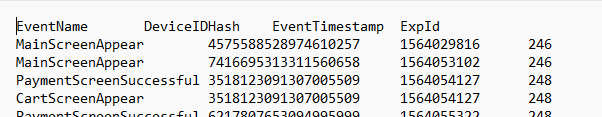

In [2]:
df = pd.read_csv("/datasets/logs_exp_us.csv", sep='\t')

## Paso 2. Preparar los datos para el análisis

#### 2.1 Cambiar nombre de las columnas de manera conveniente

In [3]:
# Nombres originales estaban pegados y en vez de usar lower, strip y replace utilizamos un diccionario
new_column_names = {
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'timestamp',
    'ExpId': 'exp_id'
}
df = df.rename(columns=new_column_names)
print(df.columns)

Index(['event_name', 'user_id', 'timestamp', 'exp_id'], dtype='object')


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Excelente trabajo al renombrar las columnas usando un diccionario. Esto no solo mejora la legibilidad del DataFrame, sino que también facilita el manejo de datos en análisis posteriores, asegurando consistencia y claridad en tus resultados.
</div>


#### 2.2 Comprobar tipo de datos y valores ausentes (correcciones necesarias).

In [4]:
# Estadística
print(df.describe())

            user_id     timestamp         exp_id
count  2.441260e+05  2.441260e+05  244126.000000
mean   4.627568e+18  1.564914e+09     247.022296
std    2.642425e+18  1.771343e+05       0.824434
min    6.888747e+15  1.564030e+09     246.000000
25%    2.372212e+18  1.564757e+09     246.000000
50%    4.623192e+18  1.564919e+09     247.000000
75%    6.932517e+18  1.565075e+09     248.000000
max    9.222603e+18  1.565213e+09     248.000000


In [5]:
#5 primeras filas
print(df.head())

                event_name              user_id   timestamp  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248


In [6]:
# Información general del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   timestamp   244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Aunque no hay valores ausentes en el DataFrame, es importante considerar la posibilidad de valores atípicos o inconsistentes en los datos. Explorar la distribución de los datos puede ayudarte a detectar posibles anomalías que podrían influir en el análisis.
</div>


In [7]:
# Valores ausentes
print("\nConteo de valores ausentes por columna:")
print(df.isnull().sum())


Conteo de valores ausentes por columna:
event_name    0
user_id       0
timestamp     0
exp_id        0
dtype: int64


#### 2.3 Agregar columna: fecha, hora y columna separada para las fechas.

In [8]:
print(f"\nMax timestamp: {df['timestamp'].max()}")
print(f"Min timestamp: {df['timestamp'].min()}")


Max timestamp: 1565212517
Min timestamp: 1564029816


- Se confirma que los timestamps están en segundos
- Rango de 1.5 mil millones (1.5 x 10^9)
- Se espera para un timestamp Unix en segundos.
- Lógica para convertir a datetime (unit='s')

In [9]:
# Convertir 'timestamp' (está en segundos) a formato datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Crear columna "date" con solo la fecha, sin hora
df['date'] = df['datetime'].dt.date

print(df.head())

                event_name              user_id   timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257  1564029816     246   
1         MainScreenAppear  7416695313311560658  1564053102     246   
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248   
3         CartScreenAppear  3518123091307005509  1564054127     248   
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248   

             datetime        date  
0 2019-07-25 04:43:36  2019-07-25  
1 2019-07-25 11:11:42  2019-07-25  
2 2019-07-25 11:28:47  2019-07-25  
3 2019-07-25 11:28:47  2019-07-25  
4 2019-07-25 11:48:42  2019-07-25  


<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Muy bien al convertir la columna 'timestamp' a formato datetime y crear una nueva columna 'date'. Esto te permitirá realizar análisis temporales con mayor facilidad y precisión, lo cual es crucial para cualquier análisis basado en el tiempo.
</div>


In [10]:
# DF después de agregar columnas de fecha/hora
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   datetime    244126 non-null  datetime64[ns]
 5   date        244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


## Paso 3. Estudiar y comprobar los datos

#### 3.1 ¿Cuántos eventos hay en los registros?

In [11]:
# Eventos
total_events_original = len(df)
print(f"Total de eventos en los registros: {total_events_original}")

Total de eventos en los registros: 244126


#### 3.2 ¿Cuántos usuarios hay en los registros?

In [12]:
# Usuarios en registros
total_users_original = df['user_id'].nunique()
print(f"Total de usuarios en los registros: {total_users_original}")

Total de usuarios en los registros: 7551


#### 3.3 ¿Cuál es el promedio de eventos por usuario?

In [13]:
# Promedio eventos por usuario
avg_events_per_user = total_events_original / total_users_original
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

Promedio de eventos por usuario: 32.33


#### 3.4 ¿Qué periodo de tiempo cubren los datos? 

##### 3.4.1 Encuentra la fecha máxima y mínima.

In [14]:
# Original
min_datetime = df['datetime'].min()
max_datetime = df['datetime'].max()
print(f"\n4. Periodo de tiempo cubierto por los datos (original):")
print(f"   Fecha y hora mínima: {min_datetime}")
print(f"   Fecha y hora máxima: {max_datetime}")


4. Periodo de tiempo cubierto por los datos (original):
   Fecha y hora mínima: 2019-07-25 04:43:36
   Fecha y hora máxima: 2019-08-07 21:15:17


<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
Has hecho un buen trabajo al determinar el periodo de tiempo cubierto por los datos. Comprender el contexto temporal es esencial para interpretar correctamente los resultados de tu análisis.
</div>


##### 3.4.2 Traza un histograma por fecha y hora.


--- Histograma de Distribución de Eventos por Fecha y Hora ---


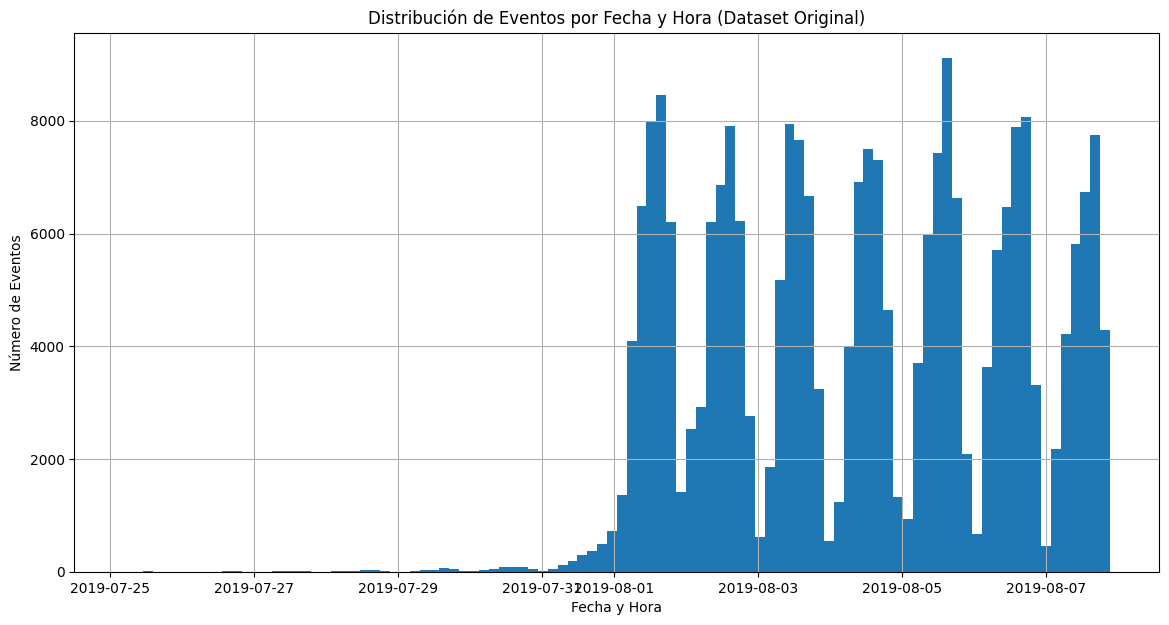

In [15]:
print("\n--- Histograma de Distribución de Eventos por Fecha y Hora ---")
plt.figure(figsize=(14, 7))
df['datetime'].hist(bins=100)
plt.title('Distribución de Eventos por Fecha y Hora (Dataset Original)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Eventos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
El histograma de distribución de eventos es útil para visualizar la frecuencia de eventos a lo largo del tiempo.
</div>


##### ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?

###### R/- Los datos no son igualmente completos para todo el periodo. 

##### ¿Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y podría sesgar el panorama general?

###### R/- La sección anterior al 1/08/2019 probablemente contiene eventos parciales o se registraron con fallas técnicas
- Podría introducir sesgos en cualquier análisis de comportamiento o en los resultados de los experimentos.
- Para garantizar la validez de nuestras conclusiones es fundamental filtrar el dataset para incluir únicamente el periodo donde los datos son completos y fiables.

#### Análisis del Histograma:
- Es evidente que el volumen de eventos no es uniforme a lo largo de todo el periodo.
- Se aprecia una cola de datos muy baja y dispersa desde la fecha mínima (2019-07-25) hasta aproximadamente el 31 de julio de 2019.
- A partir del 1 de agosto de 2019 el volumen de eventos aumenta drásticamente y se mantiene alto hasta el final del periodo de registro.

##### 3.4.5  Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior.

In [16]:
# Definir fecha de inicio completa basada en la observación del histograma
start_date_complete = pd.to_datetime('2019-08-01').date()

##### 3.4.6  ¿Qué periodo representan realmente los datos?

In [17]:
#Filtro DF incluir datos a partir de esa fecha
df_filtered = df[df['date'] >= start_date_complete].copy()

print(f"\n--- Filtro periodo completo ---")
print(f"Fecha inicio para datos completos (según histograma): {start_date_complete}")
print(f"   Fecha y hora mínima (filtrada): {df_filtered['datetime'].min()}")
print(f"   Fecha y hora máxima (filtrada): {df_filtered['datetime'].max()}")


--- Filtro periodo completo ---
Fecha inicio para datos completos (según histograma): 2019-08-01
   Fecha y hora mínima (filtrada): 2019-08-01 00:07:28
   Fecha y hora máxima (filtrada): 2019-08-07 21:15:17


#### 3.5 ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [18]:
# Pérdida datos
events_lost = total_events_original - len(df_filtered)
users_lost = total_users_original - df_filtered['user_id'].nunique()

print(f"\nDatos perdidos al excluir periodos más antiguos:")
print(f"   Eventos perdidos: {events_lost} ({events_lost / total_events_original:.2%})")
print(f"   Usuarios perdidos: {users_lost} ({users_lost / total_users_original:.2%})")


Datos perdidos al excluir periodos más antiguos:
   Eventos perdidos: 2828 (1.16%)
   Usuarios perdidos: 17 (0.23%)


<div class="alert alert-block alert-warning">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Has calculado correctamente la pérdida de datos al excluir periodos más antiguos. Sería útil evaluar si esta pérdida afecta significativamente los resultados del análisis, especialmente si los datos perdidos representan un comportamiento único o diferente.
</div>


#### 3.6 Asegúrate de tener usuarios de los tres grupos experimentales.

- Asegurar que los 3 grupos experimentales (246, 247, 248) estén en dataset filtrado (base del test A/A/B)

In [19]:
# Asegurar usuarios de los 3 grupos experimentales.
# nunique() para contar usuarios únicos por grupo
users_per_exp_id = df_filtered.groupby('exp_id')['user_id'].nunique()
print(users_per_exp_id)
print(f"Grupos experimentales únicos presentes: {df_filtered['exp_id'].unique()}")

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64
Grupos experimentales únicos presentes: [246 247 248]


<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Buen trabajo al asegurarte de que los tres grupos experimentales están presentes en los datos filtrados. Esto es esencial para la validez del análisis experimental, ya que permite comparaciones significativas entre los grupos.
</div>


- Se confirma que los 3 exp_id están presentes y la cantidad de usuarios es similar.
- Fundamental para el experimento.

In [20]:
# Verificar si la cantidadf de usuarios es similar
print("\n Distribución de usuarios por grupo experimental:")
min_users_per_group = users_per_exp_id.min()
max_users_per_group = users_per_exp_id.max()
print(f"   Mínimo de usuarios en un grupo: {min_users_per_group}")
print(f"   Máximo de usuarios en un grupo: {max_users_per_group}")
print(f"   Diferencia entre el grupo con más y menos usuarios: {max_users_per_group - min_users_per_group}")
print(f"   Proporción de diferencia (respecto al mínimo): {((max_users_per_group - min_users_per_group) / min_users_per_group * 100):.2f}%")


 Distribución de usuarios por grupo experimental:
   Mínimo de usuarios en un grupo: 2484
   Máximo de usuarios en un grupo: 2537
   Diferencia entre el grupo con más y menos usuarios: 53
   Proporción de diferencia (respecto al mínimo): 2.13%


<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Aunque la diferencia en el número de usuarios entre los grupos experimentales es pequeña, sería beneficioso realizar un análisis más detallado para asegurar que esta diferencia no sesgue los resultados. Esto es importante para mantener la validez de las conclusiones del experimento.
</div>


- Verificación crítica:
    - Los tres grupos experimentales (246, 247 y 248) están presentes en el dataset filtrado.
    - La cantidad de usuarios en cada grupo es muy similar.
    - Diferencia entre grupo más grande y más pequeño de 53 usuarios (desviación de 2.13% respecto al más pequeño)
    - Diferencia mínima y no significativa para un test A/A/B.
    - Confirma que la asignación de usuarios a los grupos es equilibrada y que podemos proceder con los experimentos.

## Paso 4. Estudiar el embudo de eventos

#### 4.1 Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [21]:
# Eventos en los registros y frecuencia de suceso.
event_frequency = df_filtered['event_name'].value_counts()
print(event_frequency)

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


---
- Análisis:
---
    - MainScreenAppear es el evento más frecuente (esperable por ser la pantalla principal)
    - Le siguen la pantalla de ofertas, carrito y pago.
    - Tutorial tiene una frecuencia muy baja (no es un evento central en el flujo de compra principal)
---

#### 4.2 Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [22]:
# Cantidad de usuarios que hacen estas acciones (ordenar por número de usuarios que lo hacen al menos una vez)
users_per_event = df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
total_unique_users_in_filtered_df = df_filtered['user_id'].nunique() # total de usuarios únicos en df_filtered

event_user_proportion = pd.DataFrame({
    'Unique_Users': users_per_event,
    'Proportion_of_Total_Users': (users_per_event / total_unique_users_in_filtered_df * 100).round(2)
})
print(event_user_proportion)


                         Unique_Users  Proportion_of_Total_Users
event_name                                                      
MainScreenAppear                 7419                      98.47
OffersScreenAppear               4593                      60.96
CartScreenAppear                 3734                      49.56
PaymentScreenSuccessful          3539                      46.97
Tutorial                          840                      11.15


---
- Análisis:
---
    - Casi todos los usuarios (98.47%) acceden a pantalla principal (MainScreenAppear) /excelente punto de partida para el embudo.
    - Aproximadamente el 61% de los usuarios totales acceden a la pantalla de ofertas.
    - El 50% de los usuarios llegan a la pantalla del carrito.
    - El 47% de los usuarios logran realizar un pago exitoso.
    - Solo un 11.15% interactúa con el tutorial (no es parte del flujo de compra principal - acción opcional).
---

#### 4.3 ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [23]:
# Orden típico de embudo en una app de ecommerce:
# 1 - MainScreenAppear (Pantalla principal) ->
# 2 - OffersScreenAppear (Pantalla de Ofertas / Catálogo) ->
# 3 - CartScreenAppear (Pantalla del Carrito) -> 
# 4 - PaymentScreenSuccessful (Pago Exitoso)
# Acción "Tutorial" y "SearchScreenAppear" no parecen ser parte directa del embudo de compra principal

funnel_events = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

print(f"\n--- Orrden propuesto del embudo de eventos ---")
print("Orden lógico de las acciones para el embudo de ventas (basado en el flujo de e-commerce):")
for i, event in enumerate(funnel_events):
    print(f"{i+1}. {event}")



--- Orrden propuesto del embudo de eventos ---
Orden lógico de las acciones para el embudo de ventas (basado en el flujo de e-commerce):
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful


---
- Análisis:
---
    - Orden lógico y estándar para una aplicación de comercio electrónico. 
    - Acciones Tutorial y SearchScreenAppear (no apareció en value_counts) son acciones laterales) 
    - Se han excluido del embudo principal de compra.
---

#### 4.4 Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [24]:
# Embudo de eventos y tasas de conversión
funnel_data = pd.DataFrame(columns=['Event', 'Users', 'Proportion_from_first_step', 'Conversion_Rate_to_next'])

# Users_per_event (counts únicos)
users_in_funnel_order = [users_per_event.loc[event] for event in funnel_events]

for i, event in enumerate(funnel_events):
    users_at_stage = users_in_funnel_order[i]

    # Proporción (MainScreenAppear)
    proportion_from_first_step = (users_at_stage / users_in_funnel_order[0] * 100).round(2)

    # Tasa de conversión de etapa anterior
    conversion_rate_to_next = 0.0
    if i == 0: # La primera etapa no tiene una conversión anterior en este contexto
        conversion_rate_to_next = 100.0 # Se considera el 100% de los que "llegan" a esta primera etapa
    elif users_in_funnel_order[i-1] > 0: # Evitar división por cero
        conversion_rate_to_next = (users_at_stage / users_in_funnel_order[i-1] * 100).round(2)

    funnel_data.loc[i] = [event, users_at_stage, proportion_from_first_step, conversion_rate_to_next]

print(funnel_data)

                     Event Users  Proportion_from_first_step  \
0         MainScreenAppear  7419                      100.00   
1       OffersScreenAppear  4593                       61.91   
2         CartScreenAppear  3734                       50.33   
3  PaymentScreenSuccessful  3539                       47.70   

   Conversion_Rate_to_next  
0                   100.00  
1                    61.91  
2                    81.30  
3                    94.78  


<div class="alert alert-block alert-success">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
Has implementado un análisis de embudo de conversión muy detallado. Esto proporciona una visión clara de cómo los usuarios progresan a través de las etapas clave, permitiendo identificar áreas de mejora en el proceso de conversión.
</div>


---
- Análisis del embudo:
---
    - MainScreenAppear: 7419 usuarios (100% de nuestra base de usuarios que inicia el embudo)
    - OffersScreenAppear: 4593 usuarios (61.91% de usuarios de pantalla principal llegan a pantalla ofertas / Caída notable
    - CartScreenAppear: 3734 usuarios (81.30% de usuarios de pantalla ofertas añaden algo al carrito / Buena tasa conversión.
    - PaymentScreenSuccessful: 
        - 3539 usuarios (94.78% de usuarios con el carrito logran realizar un pago exitoso)
        - Excelente tasa de finalización
        - La mayoría de usuarios que llegan al carrito completan la compra.
---

#### 4.5 ¿En qué etapa pierdes más usuarios?

In [25]:
# Mayor pérdida donde la tasa de conversión de la etapa anterior a la actual es la más baja.
# O mayor caída absoluta en el número de usuarios.
# Caída absoluta de usuarios entre etapas
user_drops_abs = [users_in_funnel_order[i-1] - users_in_funnel_order[i] for i in range(1, len(users_in_funnel_order))]

# Índice de mayor pérdida absoluta
if user_drops_abs: # transiciones para analizar
    max_loss_index = user_drops_abs.index(max(user_drops_abs))
    stage_of_max_loss_transition = f"{funnel_events[max_loss_index]} -> {funnel_events[max_loss_index+1]}"
    users_lost_in_transition = max(user_drops_abs)
    percentage_lost_in_transition = (users_lost_in_transition / users_in_funnel_order[max_loss_index] * 100).round(2)

    print(f"La mayor pérdida de usuarios ocurre en la transición: {stage_of_max_loss_transition}")
    print(f"Número de usuarios perdidos en esta transición: {users_lost_in_transition}")
    print(f"Porcentaje de usuarios perdidos en esta transición (respecto a la etapa anterior): {percentage_lost_in_transition:.2f}%")
else:
    print("\n--- Paso 4.5: No hay transiciones de embudo para analizar pérdidas. ---")



La mayor pérdida de usuarios ocurre en la transición: MainScreenAppear -> OffersScreenAppear
Número de usuarios perdidos en esta transición: 2826
Porcentaje de usuarios perdidos en esta transición (respecto a la etapa anterior): 38.09%


<div class="alert alert-block alert-warning">
<b>Celda [25]</b> <a class="tocSkip"></a><br>
Identificaste correctamente la mayor pérdida de usuarios en el embudo. Sería útil explorar posibles razones para esta caída significativa y considerar estrategias para mejorar la retención en esa etapa, lo cual podría incrementar las tasas de conversión.
</div>


---
- Análisis:
---
    - La mayor fuga de usuarios ocurre al principio del embudo
    - El 38% de usuarios que ven pantalla principal no llegan a pantalla de ofertas.
    - Esta es la etapa más crítica para investigar posibles mejoras en la interfaz de usuario, la navegación o el contenido.
---

#### 4.6 ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [26]:
# Proporción de usuarios en la última etapa "PaymentScreenSuccessful" con respecto a "MainScreenAppear"
percentage_full_journey = funnel_data.loc[funnel_data['Event'] == 'PaymentScreenSuccessful', 'Proportion_from_first_step'].iloc[0]

print(f"Porcentaje de usuarios que hacen todo el viaje desde '{funnel_events[0]}' hasta '{funnel_events[-1]}': {percentage_full_journey:.2f}%")

Porcentaje de usuarios que hacen todo el viaje desde 'MainScreenAppear' hasta 'PaymentScreenSuccessful': 47.70%


---
- Análisis:
---
    - Aproximadamente el 47.70% de usuarios que llegan a pantalla principal completan un pago exitoso. 
    - Buen KPI para rendimiento general de la aplicación en su flujo de conversión.
---

- Conclusión Paso 4:
    - Flujo de embudo de 4 etapas y cálculo de tasas de conversión entre ellas. 
    - Mayor oportunidad de mejora se encuentra en la transición de la MainScreenAppear a la OffersScreenAppear.
    - La app es muy eficiente en las etapas finales del embudo (carrito a pago)
---

## Paso 5. Estudiar los resultados del experimento (Test A/A/B)

- Test A/A para verificar la homogeneidad de los grupos de control
- Test A/B para comparar el grupo de tratamiento con el control combinado.

#### 5.1  Cuántos usuarios hay en cada grupo

- Es importante saber cuántos usuarios únicos tenemos en cada uno de los grupos experimentales (246, 247, 248)
- Y en el grupo de control combinado (resultado de unir 246 y 247).
- Esto nos da una idea del tamaño de las muestras con las que estamos trabajando.

In [27]:
import numpy as np # Asegurarse de que numpy esté importado para la función de test Z
from statsmodels.stats.proportion import proportions_ztest

# Separar grupos de usuarios únicos en el df_filtered
group_246_users = df_filtered[df_filtered['exp_id'] == 246]['user_id'].nunique()
group_247_users = df_filtered[df_filtered['exp_id'] == 247]['user_id'].nunique()
group_248_users = df_filtered[df_filtered['exp_id'] == 248]['user_id'].nunique()

# Crear grupo de control combinado A (246 + 247)
group_A_combined_users = df_filtered[df_filtered['exp_id'].isin([246, 247])]['user_id'].nunique()

print(f"Número de usuarios únicos en Grupo 246: {group_246_users}")
print(f"Número de usuarios únicos en Grupo 247: {group_247_users}")
print(f"Número de usuarios únicos en Grupo 248 (tratamiento): {group_248_users}")
print(f"Número de usuarios únicos en Grupo A Combinado (246 + 247): {group_A_combined_users}")

Número de usuarios únicos en Grupo 246: 2484
Número de usuarios únicos en Grupo 247: 2513
Número de usuarios únicos en Grupo 248 (tratamiento): 2537
Número de usuarios únicos en Grupo A Combinado (246 + 247): 4997


- Análisis:
    - Los tamaños de los grupos son bastante similares y robustos
    - Alrededor de 2500 usuarios por grupo individual
    - Y casi 5000 en el grupo combinado A).
    - Esto es una buena base para las pruebas estadísticas.

#### 5.2 Definición y ajuste del nivel de significancia

- Antes de las pruebas de hipótesis se debe establecer un nivel de significancia (alpha).
    - Es el umbral para determinar si un resultado es estadísticamente significativo. 
    - Un alpha=0.05 significa que:
        - Estamos dispuestos a aceptar una probabilidad del 5% de cometer un error de Tipo I
        - Es decir, falso positivo (encontrar una diferencia cuando no la hay).

- Se realizan múltiples pruebas de hipótesis (para cada evento en el embudo)
- Aumenta la probabilidad de obtener un falso positivo por casualidad.
- Aplicars la corrección de Bon0ferroni (ajusta el nivel significancia dividiendo el alpha original por el número de pruebas)

---
- ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas?
- Calcula cuántas pruebas de hipótesis estadísticas has realizado.
- ¿Cuál debería ser el nivel de significancia (ajustado)?
---

In [28]:
# Nivel de significancia (original)
alpha = 0.05

# Nombres de los eventos(embudo)
funnel_events = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Pruebas de hipótesis que se realizarán:
# Test A/A: 1 por cada evento del embudo
# Test A/B: 1 por cada evento del embudo
num_comparisons = len(funnel_events) # set de pruebas (A/A o A/B)

# Z-test para proporciones (función auxiliar)
def run_z_test(group1_users_total, group1_event_users, group2_users_total, group2_event_users, event_name, alpha_adjusted, test_type):
    # k = número de éxitos (usuarios que realizaron el evento)
    # n = número de ensayos (usuarios totales en el grupo)
    count = np.array([group1_event_users, group2_event_users])
    nobs = np.array([group1_users_total, group2_users_total])

    z_stat, p_value = proportions_ztest(count, nobs)

    print(f"\n{test_type} - Evento: {event_name}")
    print(f"  Proporción Grupo 1: {(group1_event_users / group1_users_total * 100):.2f}%")
    print(f"  Proporción Grupo 2: {(group2_event_users / group2_users_total * 100):.2f}%")
    print(f"  P-valor: {p_value:.4f}")
    if p_value < alpha_adjusted:
        print(f"  ¡Rechazamos H0! Hay una diferencia estadísticamente significativa (p < {alpha_adjusted:.4f}).")
    else:
        print(f"  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= {alpha_adjusted:.4f}).")


print(f"\n--- 5.2: Nivel de significancia y Ajuste de Bonferroni ---")
print(f"Nivel de significancia original (alpha): {alpha}")
print(f"Número de eventos clave para el embudo (pruebas por set): {num_comparisons}")

# Para el test A/A y test A/B, tenemos "num_comparisons" pruebas.
# Se asume que se aplica por cada set (A/A y A/B por separado).
alpha_bonferroni = alpha / num_comparisons
print(f"Nivel de significancia ajustado con Bonferroni para cada set de {num_comparisons} comparaciones: {alpha_bonferroni:.4f}")


--- 5.2: Nivel de significancia y Ajuste de Bonferroni ---
Nivel de significancia original (alpha): 0.05
Número de eventos clave para el embudo (pruebas por set): 4
Nivel de significancia ajustado con Bonferroni para cada set de 4 comparaciones: 0.0125


- Análisis:
    - Nivel de significancia original de 0.05.
    - Se realizan 4 comparaciones para cada set de pruebas (Test A/A y Test A/B)
    - La aplicación de la corrección de Bonferroni es apropiada
    - Resulta en un alpha ajustado de mathbf0.0125.
    - Significa que para considerar una diferencia estadísticamente significativa, el p-valor debe ser menor a 0.0125.

#### 5.3 Test A/A: Verificación de Homogeneidad (Grupos 246 vs 247)

---
- Test sirve como un control de calidad.
    - Si no hay diferencias significativas entre dos grupos de control (246 y 247)
    - Así, confirma que el sistema de asignación de usuarios a los grupos funciona bien
    - Y que estos grupos son estadísticamente idénticos antes de cualquier intervención.
---
- H0 (Hipótesis Nula):
  - No hay diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre el Grupo 246 y el Grupo 247.

- H1 (Hipótesis Alternativa):
  - Existe una diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre el Grupo 246 y el Grupo 247.

---
¿Puedes confirmar que los grupos se dividieron correctamente?

In [29]:
print("Realizando Z-tests para verificar homogeneidad entre los grupos de control (246 vs 247):")

for event in funnel_events:
    users_246_event = df_filtered[(df_filtered['exp_id'] == 246) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    users_247_event = df_filtered[(df_filtered['exp_id'] == 247) & (df_filtered['event_name'] == event)]['user_id'].nunique()

    run_z_test(group_246_users, users_246_event, group_247_users, users_247_event, event, alpha_bonferroni, "Test A/A")

# Conclusión
print("\nConclusión del Test A/A sobre la división de grupos:")
print("Si ninguna de las pruebas de los eventos clave mostró una diferencia estadísticamente significativa, podemos confirmar que los grupos 246 y 247 se dividieron correctamente y son homogéneos. Esto valida que podemos combinarlos para el grupo de control 'A' en el test A/B.")

Realizando Z-tests para verificar homogeneidad entre los grupos de control (246 vs 247):

Test A/A - Evento: MainScreenAppear
  Proporción Grupo 1: 98.63%
  Proporción Grupo 2: 98.53%
  P-valor: 0.7571
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/A - Evento: OffersScreenAppear
  Proporción Grupo 1: 62.08%
  Proporción Grupo 2: 60.49%
  P-valor: 0.2481
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/A - Evento: CartScreenAppear
  Proporción Grupo 1: 50.97%
  Proporción Grupo 2: 49.26%
  P-valor: 0.2288
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/A - Evento: PaymentScreenSuccessful
  Proporción Grupo 1: 48.31%
  Proporción Grupo 2: 46.08%
  P-valor: 0.1146
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Conclusión del Test A/A sobre la división de grupos:
Si ninguna de las pr

<div class="alert alert-block alert-success">
<b>Celda [29]</b> <a class="tocSkip"></a><br>
Has realizado adecuadamente las pruebas de hipótesis A/A para verificar la homogeneidad de los grupos de control. Esto es fundamental para asegurar la validez del análisis A/B posterior, garantizando que las diferencias observadas se deban al tratamiento y no a variaciones preexistentes.
</div>


---
- Análisis:
    - Resultados excelente para todos los eventos del embudo
    - Los p-valores son mucho mayores que nuestro alpha ajustado (0.0125).
    - Significa que no hay diferencias estadísticamente significativas entre los grupos de control 246 y 247.
---
- Si podemos confirmar que los grupos se dividieron correctamente y son homogéneos.
- Crucial y valida la metodología del experimento.
- Permite combinar los grupos 246 y 247 en un único grupo de control para compararlo con el grupo de tratamiento 248
- Lo que aumenta la potencia estadística.

#### 5.4. Test A/B: Comparación con el Grupo Alterado (Grupo A Combinado vs Grupo 248)

- Comparar rendimiento del grupo de tratamiento (248, con la nueva fuente) con el grupo de control combinado (246 + 247).
- Permite determinar si el cambio introducido tuvo un efecto estadísticamente significativo en las métricas de conversión.

    - H0 (Hipótesis Nula): No hay diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre el Grupo A Combinado y el Grupo 248.

    - H1 (Hipótesis Alternativa): Existe una diferencia estadísticamente significativa en la proporción de usuarios que realizan el evento entre el Grupo A Combinado y el Grupo 248.

---
- Hacer lo mismo para el grupo con fuentes alteradas.
- Compara los resultados con los resultados combinados de los grupos de control.

In [30]:
print("Realizando Z-tests para comparar el Grupo de Control (A Combinado) con el Grupo de Tratamiento (248):")

for event in funnel_events:
    users_A_combined_event = df_filtered[(df_filtered['exp_id'].isin([246, 247])) & (df_filtered['event_name'] == event)]['user_id'].nunique()
    users_248_event = df_filtered[(df_filtered['exp_id'] == 248) & (df_filtered['event_name'] == event)]['user_id'].nunique()

    run_z_test(group_A_combined_users, users_A_combined_event, group_248_users, users_248_event, event, alpha_bonferroni, "Test A/B")

Realizando Z-tests para comparar el Grupo de Control (A Combinado) con el Grupo de Tratamiento (248):

Test A/B - Evento: MainScreenAppear
  Proporción Grupo 1: 98.58%
  Proporción Grupo 2: 98.27%
  P-valor: 0.2942
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/B - Evento: OffersScreenAppear
  Proporción Grupo 1: 61.28%
  Proporción Grupo 2: 60.35%
  P-valor: 0.4343
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/B - Evento: CartScreenAppear
  Proporción Grupo 1: 50.11%
  Proporción Grupo 2: 48.48%
  P-valor: 0.1818
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).

Test A/B - Evento: PaymentScreenSuccessful
  Proporción Grupo 1: 47.19%
  Proporción Grupo 2: 46.55%
  P-valor: 0.6004
  No podemos rechazar H0. No hay una diferencia estadísticamente significativa (p >= 0.0125).


<div class="alert alert-block alert-warning">
<b>Celda [30]</b> <a class="tocSkip"></a><br>
Aunque las pruebas A/B no mostraron diferencias significativas, considera revisar la potencia estadística de las pruebas para asegurar que no se estén pasando por alto efectos importantes debido a un tamaño de muestra insuficiente. Esto es crucial para interpretar correctamente los resultados del experimento.
</div>


---
- Análisis:
    - Para todas las etapas del embudo los p-valores son consistentemente altos
    - Mucho mayores que 0.0125
    - Significa que para cada evento no podemos rechazar la hipótesis nula.
---
- No se encontraron diferencias estadísticamente significativas en las proporciones de usuarios que realizaron cada evento
- Entre el Grupo A Combinado (control) y el Grupo 248 (tratamiento)
- Las pequeñas diferencias en proporciones (98.58% vs 98.27% para MainScreenAppear) son debidas al azar y no efecto de la nueva fuente.

#### 5.5. Conclusiones del Experimento

#### Validación de la División de Grupos (Test A/A): 
- Se confirmó que los dos grupos de control (246 y 247) son estadísticamente homogéneos para todas las etapas clave del embudo.
- Los p-valores para todas las comparaciones fueron significativamente mayores que el nivel de significancia ajustado (0.0125).
- Asegura que el sistema de asignación de usuarios funciona bien y que estos grupos pueden combinarse como una base de control sólida.

#### Impacto del Cambio en el Grupo 248 (Test A/B): 
- Al comparar el grupo de control combinado (246 + 247) con el grupo de tratamiento (248) para cada etapa del embudo
- No se encuentran diferencias estadísticamente significativas en la proporción de usuarios que realizaron cada acción.
- Todos los p-valores obtenidos fueron mayores que el nivel de significancia ajustado (0.0125).
- Implementación de "fuente alterada" - grupo 248 sin impacto
- Ni positivo ni negativo, en tasas de conversión de usuarios mediante embudo de eventos

#### Recomendación: 
- No hay evidencia para recomendar la implementación de la nueva fuente basada en estos resultados.
- Se podría considerar no implementarlo
- Si hay otras razones (costos de mantenimiento o simplificación técnica) para el cambio se podría proceder
- Pero sin esperar mejoras en la conversión del usuario.
- Si la empresa desea optimizar las conversiones debe enfocarse en las etapas del embudo con mayores caídas
- Como la transición de MainScreenAppear a OffersScreenAppear identificada en el Paso 4, e independientemente de la fuente del tráfico.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo Marcel! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Renombraste las columnas de manera efectiva para mejorar la legibilidad.<br>
• Convertiste correctamente los timestamps a formato datetime.<br>
• Identificaste adecuadamente el periodo de tiempo cubierto por los datos.<br>
• Aseguraste la presencia de todos los grupos experimentales en los datos filtrados.<br>
• Implementaste un análisis detallado del embudo de conversión.<br>
• Realizaste pruebas de hipótesis A/A de manera adecuada.<br>
• Mantuviste un enfoque claro y estructurado a lo largo del análisis.<br>
• Utilizaste visualizaciones para apoyar tus conclusiones.<br>
• Consideraste el ajuste de Bonferroni en tus pruebas estadísticas.<br>
• Mostraste una comprensión sólida de la importancia de la homogeneidad en los grupos de control.<br>
¡Felicidades!
</div>
